<a href="https://colab.research.google.com/github/kgpark88/visionai/blob/main/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정 분류
### 데이터셋 : FER-2013(Learn facial expressions from an image)
- https://www.kaggle.com/datasets/msambare/fer2013/data
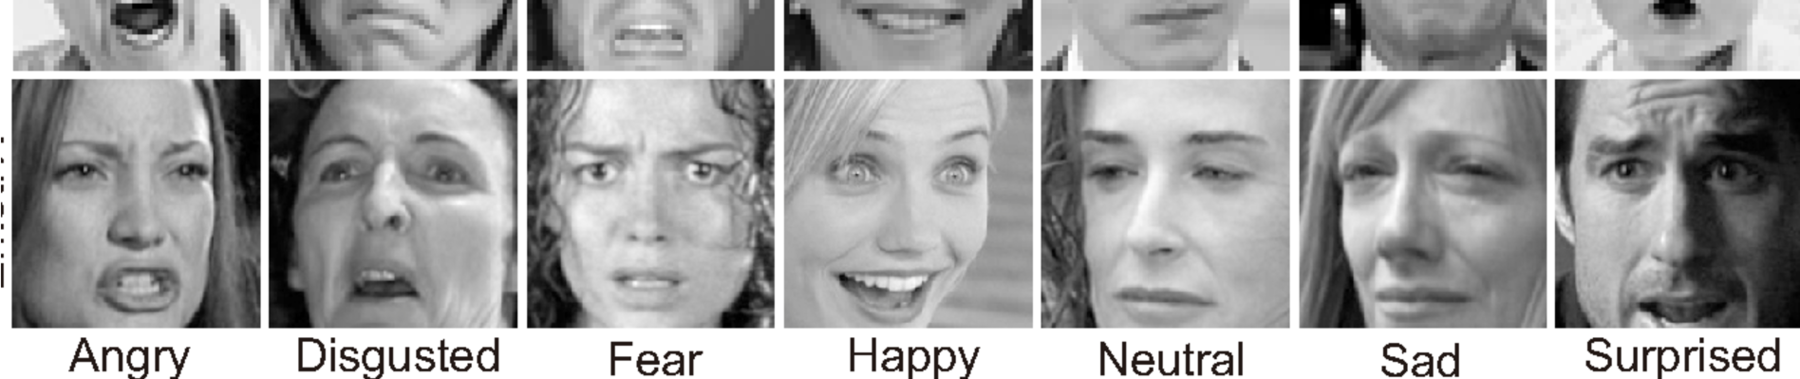

## 라이브러리 임포트

In [4]:
import cv2
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 이미지 로딩

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/visionai/fer_images.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

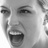

In [5]:
tf.keras.preprocessing.image.load_img('/content/fer2013/train/Angry/1541.jpg')

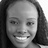

In [6]:
image = tf.keras.preprocessing.image.load_img('/content/fer2013/train/Happy/1001.jpg')
image

### 데이터셋 분리 : Train set, Test set

In [7]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=7,
                                    horizontal_flip=True,
                                    zoom_range=0.2)

train_dataset = train_generator.flow_from_directory('/content/fer2013/train',
                                                   target_size = (48, 48),
                                                   batch_size = 16,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.


In [8]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [9]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [10]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

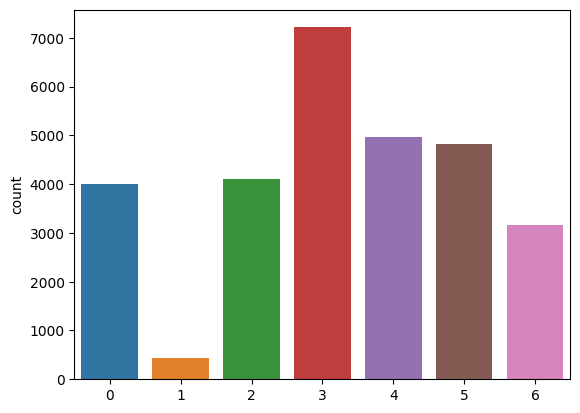

In [11]:
sns.countplot(x = train_dataset.classes);

In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.


## CNN(Convolutional Neural Network) 구축 및 트레이닝

In [13]:
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

model = Sequential()

model.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(2 * num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2 * num_detectors, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                        

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_dataset, epochs=epochs)

Epoch 1/70


KeyboardInterrupt: ignored

## 모델 저장

In [ ]:
# from keras.models import save_model

# model_json = model.to_json()
# with open('/content/drive/MyDrive/ComputerVision/weight/model_emotions.json','w') as json_file:
#     json_file.write(model_json)

# model_saved = save_model(model, '/content/drive/MyDrive/ComputerVision/weight/weights_emotions.hdf5')

<ipython-input-39-0f553fe1fc58>:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  model_saved = save_model(model, '/content/drive/MyDrive/ComputerVision/weight/weights_emotions.hdf5')


## 저장된 모델 로드

In [2]:
with open('/content/drive/MyDrive/visionai/weight/model_emotions.json', 'r') as json_file:
    json_saved_model = json_file.read()

json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_8_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"

In [5]:
model_loaded = tf.keras.models.model_from_json(json_saved_model)
model_loaded.load_weights('/content/drive/MyDrive/visionai/weight/weights_emotions.hdf5')
model_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [6]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_11 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                      

## 모델 평가

In [9]:
model_loaded.evaluate(test_dataset)

3589/3589 [==============================] - 22s 5ms/step - loss: 1.4743 - accuracy: 0.5890


[1.4743432998657227, 0.5890220403671265]

In [10]:
predictions = model_loaded.predict(test_dataset)
predictions

3589/3589 [==============================] - 15s 4ms/step


array([[3.5544303e-01, 6.8775204e-04, 3.1509560e-02, ..., 5.6345129e-01,
        4.0794786e-02, 8.1135044e-03],
       [9.9758232e-01, 7.5422338e-07, 1.0942545e-03, ..., 9.4670849e-04,
        3.6879705e-04, 2.9973538e-07],
       [9.4660497e-01, 1.6106591e-04, 2.2716474e-02, ..., 7.1368259e-03,
        2.2289379e-02, 7.5303129e-04],
       ...,
       [1.5042524e-02, 5.7932251e-04, 1.8150507e-01, ..., 2.9355669e-03,
        1.9470910e-02, 7.8044933e-01],
       [1.4266060e-03, 3.7721163e-06, 4.0193532e-02, ..., 1.0313697e-01,
        4.0550656e-03, 8.5102296e-01],
       [2.2601146e-02, 1.1575773e-03, 1.1945734e-02, ..., 2.2909935e-03,
        4.8252400e-03, 9.4789851e-01]], dtype=float32)

In [11]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([4, 0, 0, ..., 6, 6, 6])

In [12]:
test_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, predictions)

0.5890220117024241

In [14]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[297,   6,  38,   9,  63,  70,   8],
       [ 13,  34,   4,   1,   1,   1,   1],
       [ 58,   3, 235,  13,  63, 108,  48],
       [ 20,   1,  11, 768,  40,  20,  19],
       [ 94,  10,  94, 151, 109, 110,  58],
       [ 57,   1,  47,  22, 121, 334,  12],
       [ 10,   0,  35,  17,   8,   9, 337]])

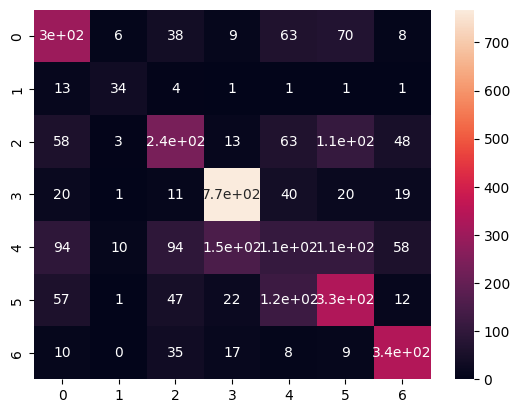

In [16]:
sns.heatmap(cm, annot=True);

In [17]:
from sklearn.metrics import classification_report

print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       491
           1       0.62      0.62      0.62        55
           2       0.51      0.45      0.47       528
           3       0.78      0.87      0.83       879
           4       0.27      0.17      0.21       626
           5       0.51      0.56      0.54       594
           6       0.70      0.81      0.75       416

    accuracy                           0.59      3589
   macro avg       0.56      0.58      0.57      3589
weighted avg       0.56      0.59      0.57      3589



## 단일 이미지 감정분류

In [ ]:
image = cv2.imread('/content/drive/MyDrive/visionai/gabriel.png')
cv2_imshow(image)

In [20]:
image.shape

(300, 400, 3)

In [21]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/visionai/haarcascade/haarcascade_frontalface_default.xml')

In [22]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)

In [23]:
faces

array([[162,  40, 128, 128]], dtype=int32)

In [ ]:
roi = image[40:40 + 128, 162:162 + 128]
cv2_imshow(roi)

In [25]:
# # CNN 객체 검출기
# import dlib

# detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/visionai/weight/mmod_human_face_detector.dat')
# detection = detector(original_image, 1)
# left, top, right, bottom = detection[0].rect.left(), detection[0].rect.top(), detection[0].rect.right(), detection[0].rect.bottom()
# roi = image[top:bottom, left:right]
# cv2_imshow(roi)

In [26]:
roi.shape

(128, 128, 3)

In [ ]:
roi = cv2.resize(roi, (48, 48))
cv2_imshow(roi)

In [28]:
roi.shape

(48, 48, 3)

In [29]:
roi

array([[[ 28,  32,  37],
        [ 22,  28,  34],
        [ 33,  37,  42],
        ...,
        [ 12,  16,  17],
        [ 16,  21,  25],
        [ 16,  25,  30]],

       [[ 27,  31,  36],
        [ 31,  36,  41],
        [ 32,  36,  41],
        ...,
        [ 11,  16,  19],
        [ 13,  19,  24],
        [ 17,  25,  28]],

       [[ 27,  31,  36],
        [ 30,  34,  39],
        [ 26,  30,  35],
        ...,
        [ 12,  17,  20],
        [ 14,  20,  25],
        [ 20,  25,  27]],

       ...,

       [[162, 185, 197],
        [166, 188, 200],
        [166, 188, 200],
        ...,
        [162, 181, 188],
        [162, 182, 188],
        [161, 180, 187]],

       [[160, 184, 196],
        [165, 187, 199],
        [166, 188, 200],
        ...,
        [161, 180, 187],
        [162, 181, 187],
        [161, 180, 187]],

       [[160, 184, 196],
        [163, 187, 199],
        [165, 187, 199],
        ...,
        [160, 179, 186],
        [161, 180, 187],
        [162, 181, 188]]

In [30]:
roi = roi / 255
roi

array([[[0.10980392, 0.1254902 , 0.14509804],
        [0.08627451, 0.10980392, 0.13333333],
        [0.12941176, 0.14509804, 0.16470588],
        ...,
        [0.04705882, 0.0627451 , 0.06666667],
        [0.0627451 , 0.08235294, 0.09803922],
        [0.0627451 , 0.09803922, 0.11764706]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.12156863, 0.14117647, 0.16078431],
        [0.1254902 , 0.14117647, 0.16078431],
        ...,
        [0.04313725, 0.0627451 , 0.0745098 ],
        [0.05098039, 0.0745098 , 0.09411765],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.10588235, 0.12156863, 0.14117647],
        [0.11764706, 0.13333333, 0.15294118],
        [0.10196078, 0.11764706, 0.1372549 ],
        ...,
        [0.04705882, 0.06666667, 0.07843137],
        [0.05490196, 0.07843137, 0.09803922],
        [0.07843137, 0.09803922, 0.10588235]],

       ...,

       [[0.63529412, 0.7254902 , 0.77254902],
        [0.65098039, 0.7372549 , 0.78431373],
        [0.65098039, 0

In [31]:
roi.shape

(48, 48, 3)

In [32]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [33]:
probs = model_loaded.predict(roi)
probs

1/1 [==============================] - 0s 239ms/step


array([[8.6139981e-04, 4.1258995e-06, 3.3114519e-04, 8.5314178e-01,
        1.4332348e-01, 2.3380064e-03, 8.0555388e-08]], dtype=float32)

In [34]:
result = np.argmax(probs)
result

3

In [35]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

## 여러 이미지 감정 분류

In [38]:
image = cv2.imread('/content/drive/MyDrive/visoinai/faces_emotions.png')
cv2_imshow(image)

AttributeError: ignored

In [ ]:
faces = face_detector.detectMultiScale(image)
faces

array([[224,  35,  90,  90],
       [625,  49,  91,  91],
       [ 23,  41,  92,  92],
       [420,  43,  97,  97],
       [420, 242,  97,  97],
       [ 18, 243,  98,  98],
       [229, 242,  85,  85],
       [627, 241,  91,  91]], dtype=int32)

In [ ]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
for x, y, w, h in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
    roi = image[y : y + h, x : x + w]
    # cv2_imshow(roi)
    roi = cv2.resize(roi, (48, 48))
    # cv2_imshow(roi)
    roi = roi / 255
    roi = np.expand_dims(roi, axis=0)
    # print(roi.shape)
    prediction = model_loaded.predict(roi)
    # print(prediction)
    cv2.putText(
        image,
        emotions[np.argmax(prediction)],
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2,
        cv2.LINE_AA,
    )
cv2_imshow(image)

## 동영상에서 감정 분류

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/ComputerVision/video/emotion_test01.mp4')
connected, video = cap.read()
print(connected, video.shape)

True (360, 640, 3)


In [ ]:
# fourcc.org
save_path = '/content/drive/MyDrive/ComputerVision/video/emotion_test01_result.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 24
output_video = cv2.VideoWriter(save_path, fourcc, fps, (video.shape[1], video.shape[0]))

In [ ]:
while cv2.waitKey(1) < 0:
    connected, frame = cap.read()
    if not connected:
        break
    faces = face_detector.detectMultiScale(
        frame, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30)
    )
    if len(faces) > 0:
        for x, y, w, h in faces:
            frame = cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = frame[y : y + h, x : x + w]
            roi = cv2.resize(roi, (48, 48))
            roi = roi / 255
            roi = np.expand_dims(roi, axis=0)
            prediction = model_loaded.predict(roi)

            if prediction is not None:
                result = np.argmax(prediction)
                cv2.putText(
                    frame,
                    emotions[result],
                    (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (255, 255, 255),
                    1,
                    cv2.LINE_AA,
                )

    cv2_imshow(frame)
    output_video.write(frame)

print("End")
output_video.release()
cv2.destroyAllWindows()